# APIs and JSON

### Homework

Before you begin, remember to import the necessary libraries.

In [142]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

#### Standard Exercises

In this exercise, you will use the [Makeup API](https://makeup-api.herokuapp.com/) from the [website](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) we saw in class to retrieve and analyse the [data related to the Maybelline brand](https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline).

1. Save the sample URL / endpoint as a string to an object called `url` and, unig the `get()` function from the `requests` library, make an HTTP request and save it to a new object named `mkp`.

In [143]:
url = "https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline"
mkp = requests.get(url)

2. Check that the status of the request from the previous point was successful *(hint: 200 = OK)*.

In [144]:
print(mkp.status_code)

200


3. Using the `.json()` method, check the contents of the data you retrieved via the API call. Then, using the `pd.DataFrame.from_dict()` function, save its contents to a DataFrame named `mkp_df`.

In [145]:
print(mkp.json())
mkp_df = pd.DataFrame.from_dict(mkp.json())
print(mkp_df.head())

[{'id': 495, 'brand': 'maybelline', 'name': 'Maybelline Face Studio Master Hi-Light Light Booster Bronzer', 'price': '14.99', 'price_sign': None, 'currency': None, 'image_link': 'https://d3t32hsnjxo7q6.cloudfront.net/i/991799d3e70b8856686979f8ff6dcfe0_ra,w158,h184_pa,w158,h184.png', 'product_link': 'https://well.ca/products/maybelline-face-studio-master_88837.html', 'website_link': 'https://well.ca', 'description': 'Maybelline Face Studio Master Hi-Light Light Boosting bronzer formula has an expert \nbalance of shade + shimmer illuminator for natural glow. Skin goes \nsoft-lit with zero glitz.\n\n\t\tFor Best Results: Brush over all shades in palette and gently sweep over \ncheekbones, brow bones, and temples, or anywhere light naturally touches\n the face.\n\n\t\t\n\t\n\n                    ', 'rating': 5.0, 'category': None, 'product_type': 'bronzer', 'tag_list': [], 'created_at': '2016-10-01T18:36:15.012Z', 'updated_at': '2017-12-23T21:08:50.624Z', 'product_api_url': 'https://makeup

4. Check the data type of all columns in the DataFrame. The `price` variable is stored as a string, but it should be a numeric variable. Convert it to numeric.

In [146]:
print(mkp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54 non-null     int64  
 1   brand               54 non-null     object 
 2   name                54 non-null     object 
 3   price               54 non-null     object 
 4   price_sign          0 non-null      object 
 5   currency            0 non-null      object 
 6   image_link          54 non-null     object 
 7   product_link        54 non-null     object 
 8   website_link        54 non-null     object 
 9   description         54 non-null     object 
 10  rating              46 non-null     float64
 11  category            31 non-null     object 
 12  product_type        54 non-null     object 
 13  tag_list            54 non-null     object 
 14  created_at          54 non-null     object 
 15  updated_at          54 non-null     object 
 16  product_ap

In [147]:
print(mkp_df["price"].dtype, "before conversions")
mkp_df["price"] = pd.to_numeric(mkp_df["price"])
print(mkp_df["price"].dtype, "after conversion")

object before conversions
float64 after conversion


5. Create a new DataFrame named `mkp_df_group` where you group all the `product_type`s and show their average price and rating. 

In [148]:
mkp_df_group = mkp_df[["product_type", "price", "rating"]].groupby(by="product_type").mean()
print(mkp_df_group)

                  price    rating
product_type                     
blush         13.065000  4.766667
bronzer       13.756667  4.750000
eyeliner       9.940000  4.233333
eyeshadow     11.847143  3.757143
foundation    14.080000  3.877778
lip_liner      8.290000  3.500000
lipstick      10.704286  4.400000
mascara        9.817273  4.160000
nail_polish    4.490000  3.433333


6. Create a scatterplot where you show the relationship between the `price` (on the x-axis) and the `rating` (on the y-axis) variables. 

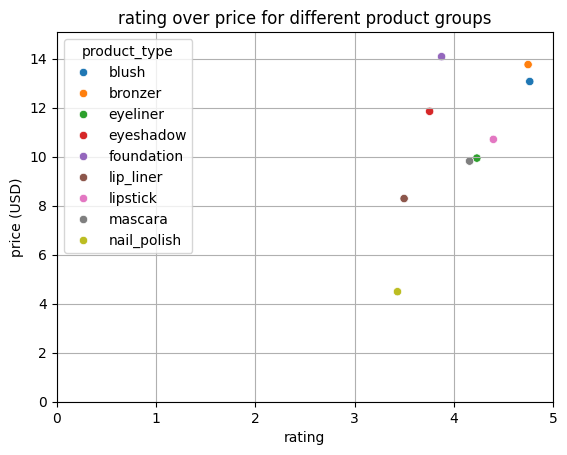

In [149]:
plot = sns.scatterplot(mkp_df_group, x="rating", y="price", hue="product_type")
plot.set_title("rating over price for different product groups")
plot.set_xlim([0, 5])
plot.set_ylim([0,mkp_df_group["price"].max()+1])
plot.set_ylabel("price (USD)")
plot.grid(True)

7. If you were to speak to the product department, which of these products would you recommend them to focus on in order to improve the overall customer satisfaction, considering their value for money?

Either nail polish or lip liner, depending on how marketing sees their target demographic, competition and production costs – 4 USD for a medium good nail polish could be a fair price, but 8 USD for a good lipliner might be a steal that attracts customers. both products offer the option to be produced in a variety of colours if the formula works / is being bought

#### Advanced Exercises

1. Using an HTTP request to the City of Milan's API endpoint that you will find at [this web page](https://dati.comune.milano.it/dataset/ds411-rilevazione-qualita-aria-2022/resource/e1cc82ec-97bb-463c-a3fb-b61be60f0956), retrieve its data and save it to a DataFrame named `df`. *(hint: careful at the number or records you're retrieving, to be sure, set the limit parameter to be greater than the total number of rows available for that dataset)*

In [150]:
records_count = 10000
response = requests.get("https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=e1cc82ec-97bb-463c-a3fb-b61be60f0956&limit="+str(records_count))
response.status_code

200

In [167]:
data = response.json()
df = pd.DataFrame.from_records(data["result"]["records"], index="_id")
df

,stazione_id,data,inquinante,valore
_id,,,,
1,1,2022-12-30T00:00:00,NO2,NaN
2,2,2022-12-30T00:00:00,C6H6,2.7
3,2,2022-12-30T00:00:00,NO2,43.0
4,2,2022-12-30T00:00:00,O3,2.0
5,2,2022-12-30T00:00:00,PM10,56.0
...,...,...,...,...
6426,7,2022-01-03T00:00:00,O3,11.0
6427,7,2022-01-03T00:00:00,PM10,57.0
6428,8,2022-01-03T00:00:00,C6H6,NaN


2. Check the data types for all the columns in the DataFrame. Then convert the `data` variable to a datetime with `format="%Y-%m-%d"`. 

In [168]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6430 entries, 1 to 6430
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stazione_id  6430 non-null   int64  
 1   data         6430 non-null   object 
 2   inquinante   6430 non-null   object 
 3   valore       4628 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 251.2+ KB
None


In [169]:
df["data"] = pd.to_datetime(df["data"], format="mixed")
df.rename(columns={ "data": "date", "stazione_id": "station_id", "inquinante": "measure", "valore": "value" }, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6430 entries, 1 to 6430
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   station_id  6430 non-null   int64         
 1   date        6430 non-null   datetime64[ns]
 2   measure     6430 non-null   object        
 3   value       4628 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 251.2+ KB
None


3. Create a new DataFrame named `df_pm10` which is a copy of `df` but contains data only for the **PM10** `inquinante`.

In [170]:
df_pm10 = df[df["measure"] == "PM10"]
df_pm10.head()

,station_id,date,measure,value
_id,,,,
5,2,2022-12-30,PM10,56.0
13,4,2022-12-30,PM10,66.0
20,6,2022-12-30,PM10,56.0
24,7,2022-12-30,PM10,47.0
32,2,2022-12-29,PM10,52.0


4. Which day was the worst in terms of levels of the **PM10** `inquinante` in the City of Milan? How many grams per cubic meter (g/m3) were detected?

In [214]:
df_pm10.sort_values(by="value", ascending=False, inplace=True)
max_value = df_pm10.iloc[0]
print(max_value)
# 14th Jan 2022, 106 g/m3

station_id                      6
date          2022-01-14 00:00:00
measure                      PM10
value                       106.0
month                           1
Name: 6241, dtype: object


/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_86898/4184865080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10.sort_values(by="value", ascending=False, inplace=True)


5. Add a new column named `month` to the `df_pm10` DataFrame where you extract the month date-part from the `date` variable. 

In [175]:
df_pm10["month"] = df["date"].dt.month
df_pm10.head()

/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_86898/364807105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10["month"] = df["date"].dt.month


,station_id,date,measure,value,month
_id,,,,,
6241,6,2022-01-14,PM10,106.0,1
6293,6,2022-01-12,PM10,100.0,1
5075,7,2022-03-18,PM10,97.0,3
5819,4,2022-02-07,PM10,96.0,2
6053,4,2022-01-25,PM10,90.0,1


6. Using the `df_pm10` DataFrame, produce a table that groups all the `months` available in the dataset (by row) and shows (for each month), the following aggregations for the column `valore`: ['min', 'mean', 'max']. 

In [185]:
df_pm10_by_month = df_pm10.groupby(by="month").agg({"value": ["min","mean","max"]})
df_pm10_by_month

value                  
        min       mean    max
month                        
1      35.0  64.027027  106.0
2       7.0  41.253165   96.0
3      21.0  46.728261   97.0
4       8.0  25.985507   53.0
5      10.0  24.416667   41.0
6      10.0  28.044118   45.0
7      12.0  24.257143   45.0
8       8.0  17.135593   41.0
9       8.0  20.379310   35.0
10     15.0  44.894737   80.0
11     15.0  33.878049   50.0
12     10.0  41.774648   66.0

7. Using the `df_pm10` DataFrame, plot a time series showing the `valore` of **PM10** for each `stazione_id` *(hint: each stazione_id will have a different line with a different color)*.

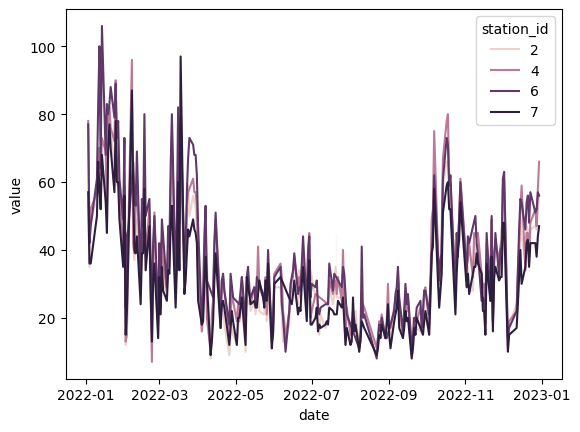

In [195]:
plot = sns.lineplot(df_pm10, x="date", y="value", hue="station_id")

8. Using an HTTP request to the City of Milan's API endpoint that you will find at [this web page](https://dati.comune.milano.it/dataset/ds484_stazioni_di_monitoraggio_inquinanti_atmosferici_dellarpa_sit/resource/b301f327-7504-4efc-8b4a-5f4a29f9d0ff), retrieve its data and save it to a DataFrame named `stations`. 

In [198]:
station_url = "https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=b301f327-7504-4efc-8b4a-5f4a29f9d0ff"
response = requests.get(station_url)
print(response.status_code)

200 {'help': 'https://dati.comune.milano.it/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'include_total': True, 'resource_id': 'b301f327-7504-4efc-8b4a-5f4a29f9d0ff', 'fields': [{'type': 'int', 'id': '_id'}, {'type': 'numeric', 'id': 'id_amat'}, {'type': 'text', 'id': 'nome'}, {'type': 'numeric', 'id': 'id_arpa'}, {'type': 'timestamp', 'id': 'inizio_operativita'}, {'type': 'timestamp', 'id': 'fine_operativita'}, {'type': 'text', 'id': 'inquinanti'}, {'type': 'numeric', 'id': 'LONG_X_4326'}, {'type': 'numeric', 'id': 'LAT_Y_4326'}, {'type': 'text', 'id': 'Location'}], 'records_format': 'objects', 'records': [{'_id': 1, 'id_amat': 1, 'nome': 'p.le Abbiategrasso', 'id_arpa': 126, 'inizio_operativita': '1900-01-01T00:00:00', 'fine_operativita': '2017-08-31T00:00:00', 'inquinanti': 'NO2', 'LONG_X_4326': 9.18218994140625, 'LAT_Y_4326': 45.432300567627, 'Location': '(45.432300567627, 9.18218994140625)'}, {'_id': 2, 'id_amat': 2, 'nome': 'via Pascal *', 'id_arpa':

In [218]:
body = response.json()
df_stations = pd.DataFrame.from_records(body["result"]["records"], index="_id")
df_stations

,id_amat,nome,id_arpa,inizio_operativita,fine_operativita,inquinanti,LONG_X_4326,LAT_Y_4326,Location
_id,,,,,,,,,
1,1,p.le Abbiategrasso,126,1900-01-01T00:00:00,2017-08-31T00:00:00,NO2,9.18219,45.432301,"(45.432300567627, 9.18218994140625)"
2,2,via Pascal *,100,1900-01-01T00:00:00,2099-12-31T00:00:00,"NO2, SO2, PM25, SO2, O3, PM10, C6H6",9.23478,45.474098,"(45.4740982055664, 9.23478031158447)"
3,3,viale Liguria,107,1900-01-01T00:00:00,2099-12-31T00:00:00,"NO2, CO_8h",9.16944,45.444199,"(45.4441986083984, 9.16944026947021)"
4,4,viale Marche,2,1900-01-01T00:00:00,2099-12-31T00:00:00,"C6H6, CO_8h, PM25, PM10, NO2",9.19084,45.496300,"(45.4962997436523, 9.19083976745605)"
5,5,Parco Lambro,124,1900-01-01T00:00:00,2017-08-31T00:00:00,"NO2, O3",9.24730,45.499599,"(45.4995994567871, 9.24730014801025)"
6,6,via Senato *,125,1900-01-01T00:00:00,2099-12-31T00:00:00,"PM25, PM10, C6H6, CO_8h, NO2",9.19792,45.470501,"(45.4705009460449, 9.19791984558105)"
7,7,Verziere,85,1900-01-01T00:00:00,2099-12-31T00:00:00,"O3, PM10, NO2, CO_8h",9.19534,45.463501,"(45.4635009765625, 9.19534015655518)"
8,8,p.le Zavattari,7,1900-01-01T00:00:00,2017-08-31T00:00:00,"CO_8h, NO2, C6H6",9.14177,45.476101,"(45.4761009216309, 9.141770362854)"
9,9,via Juvara,7,1900-01-01T00:00:00,2007-06-11T00:00:00,"SO2, SO2, NO2, O3, PM10, PM25",9.22045,45.473499,"(45.4734992980957, 9.22045040130615)"


9. Which station's `nome` is the one that recorded the highest levels of **PM10** as recorded in the `df_pm10` DataFrame?

In [216]:
id_of_needed_station = max_value["station_id"]
id_of_needed_station

6

In [220]:
df_stations.loc[id_of_needed_station]["nome"]

'via Senato *'